In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

```
Description:
This dataset contains information on customer purchase behavior across various attributes, aiming to help data scientists
and analysts understand the factors influencing purchase decisions.
The dataset includes demographic information, purchasing habits, and other relevant features.
Features:

Age: Customer's age
Gender: Customer's gender (0: Male, 1: Female)
Annual Income: Annual income of the customer in dollars
Number of Purchases: Total number of purchases made by the customer
Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)
Time Spent on Website: Time spent by the customer on the website in minutes
Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)
Discounts Availed: Number of discounts availed by the customer (range: 0-5)
PurchaseStatus (Target Variable): Likelihood of the customer making a purchase (0: No, 1: Yes)
Target Variable:
Distribution of the Target Variable (PurchaseStatus):

0 (No Purchase): 48%
1 (Purchase): 52%
```

In [2]:
df = pd.read_csv('/kaggle/input/predict-customer-purchase-behavior-dataset/customer_purchase_data.csv')
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [4]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [5]:
df.isna().sum().any()

False

In [6]:
df.duplicated().sum()

112

In [7]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [8]:
df.shape

(1388, 9)

In [9]:
df.Age.min() , df.Age.max()

(18, 70)

<Axes: ylabel='count'>

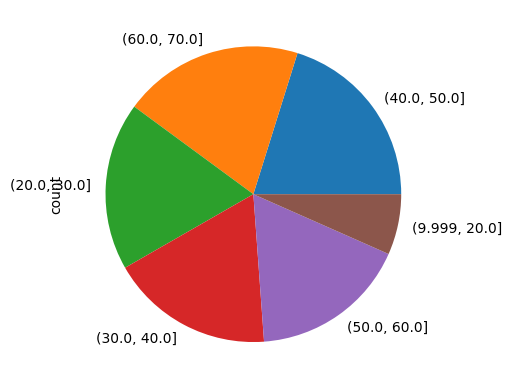

In [10]:
df.Age.value_counts(bins=[10,20,30,40,50,60,70]).plot(kind='pie')

<Axes: ylabel='count'>

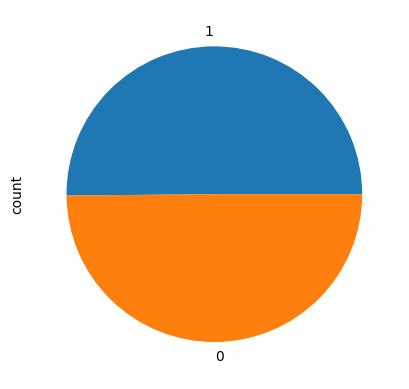

In [11]:
df.Gender.value_counts().plot(kind='pie')

In [12]:
df.ProductCategory.value_counts().sort_values(ascending=True)

ProductCategory
2    254
0    269
3    270
4    289
1    306
Name: count, dtype: int64

In [13]:
df.AnnualIncome.value_counts(bins=10).sort_values(ascending=True)

(32979.879, 45958.245]      120
(84893.344, 97871.711]      130
(136806.81, 149785.176]     135
(123828.444, 136806.81]     136
(58936.612, 71914.978]      140
(97871.711, 110850.077]     141
(71914.978, 84893.344]      142
(45958.245, 58936.612]      145
(110850.077, 123828.444]    148
(19871.728, 32979.879]      151
Name: count, dtype: int64

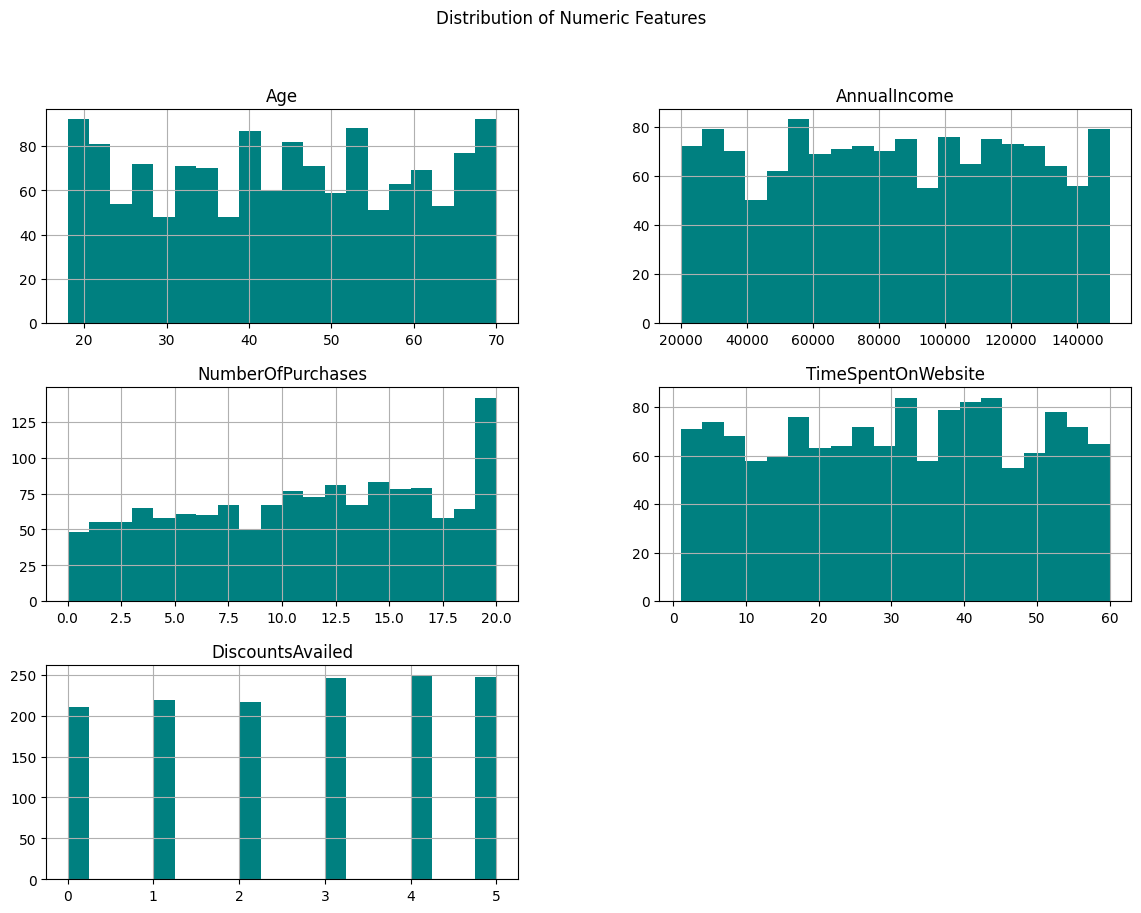

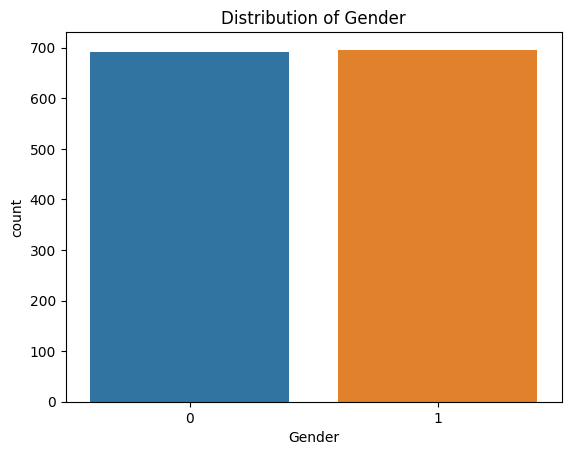

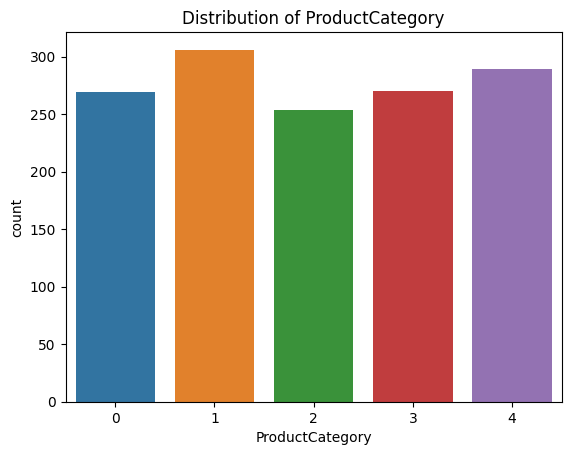

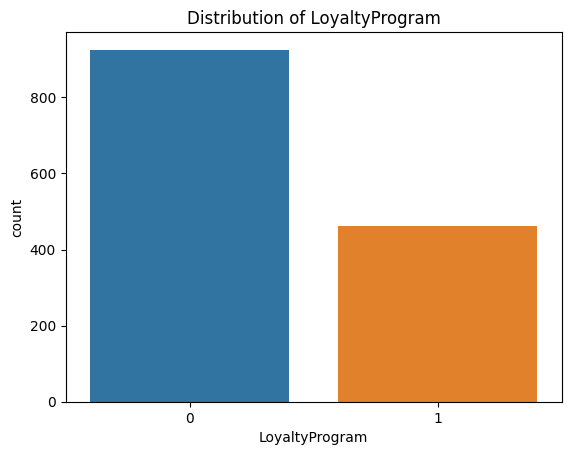

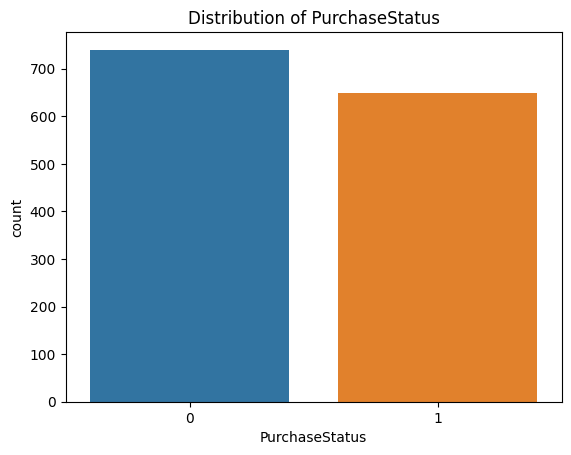

In [14]:
# Plotting the distribution of numeric features
numeric_features = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']
df[numeric_features].hist(bins=20, figsize=(14, 10), color='teal')
plt.suptitle('Distribution of Numeric Features')
plt.show()

# Plotting the distribution of categorical features
categorical_features = ['Gender', 'ProductCategory', 'LoyaltyProgram', 'PurchaseStatus']
for feature in categorical_features:
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()


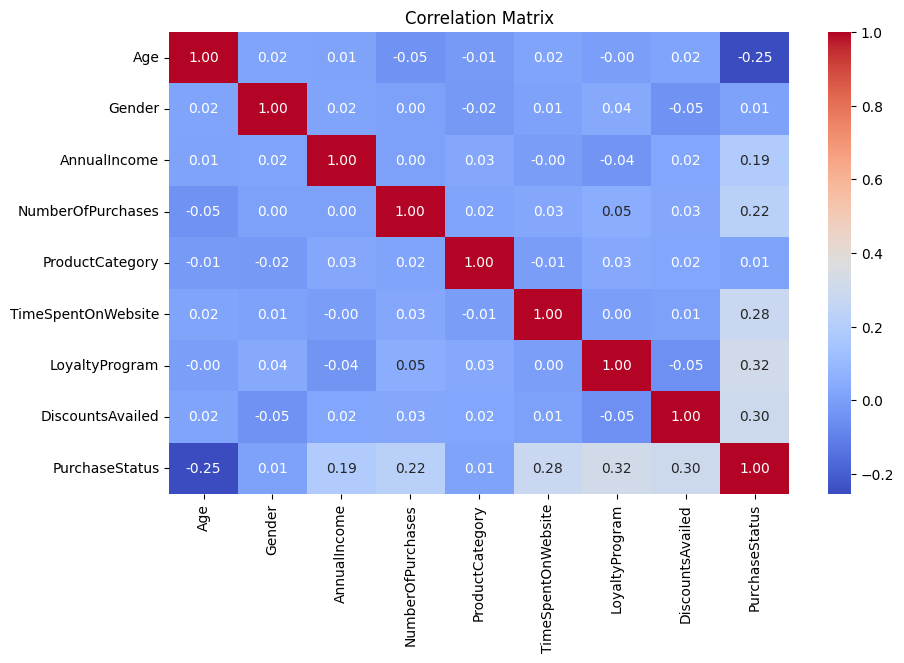

In [15]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

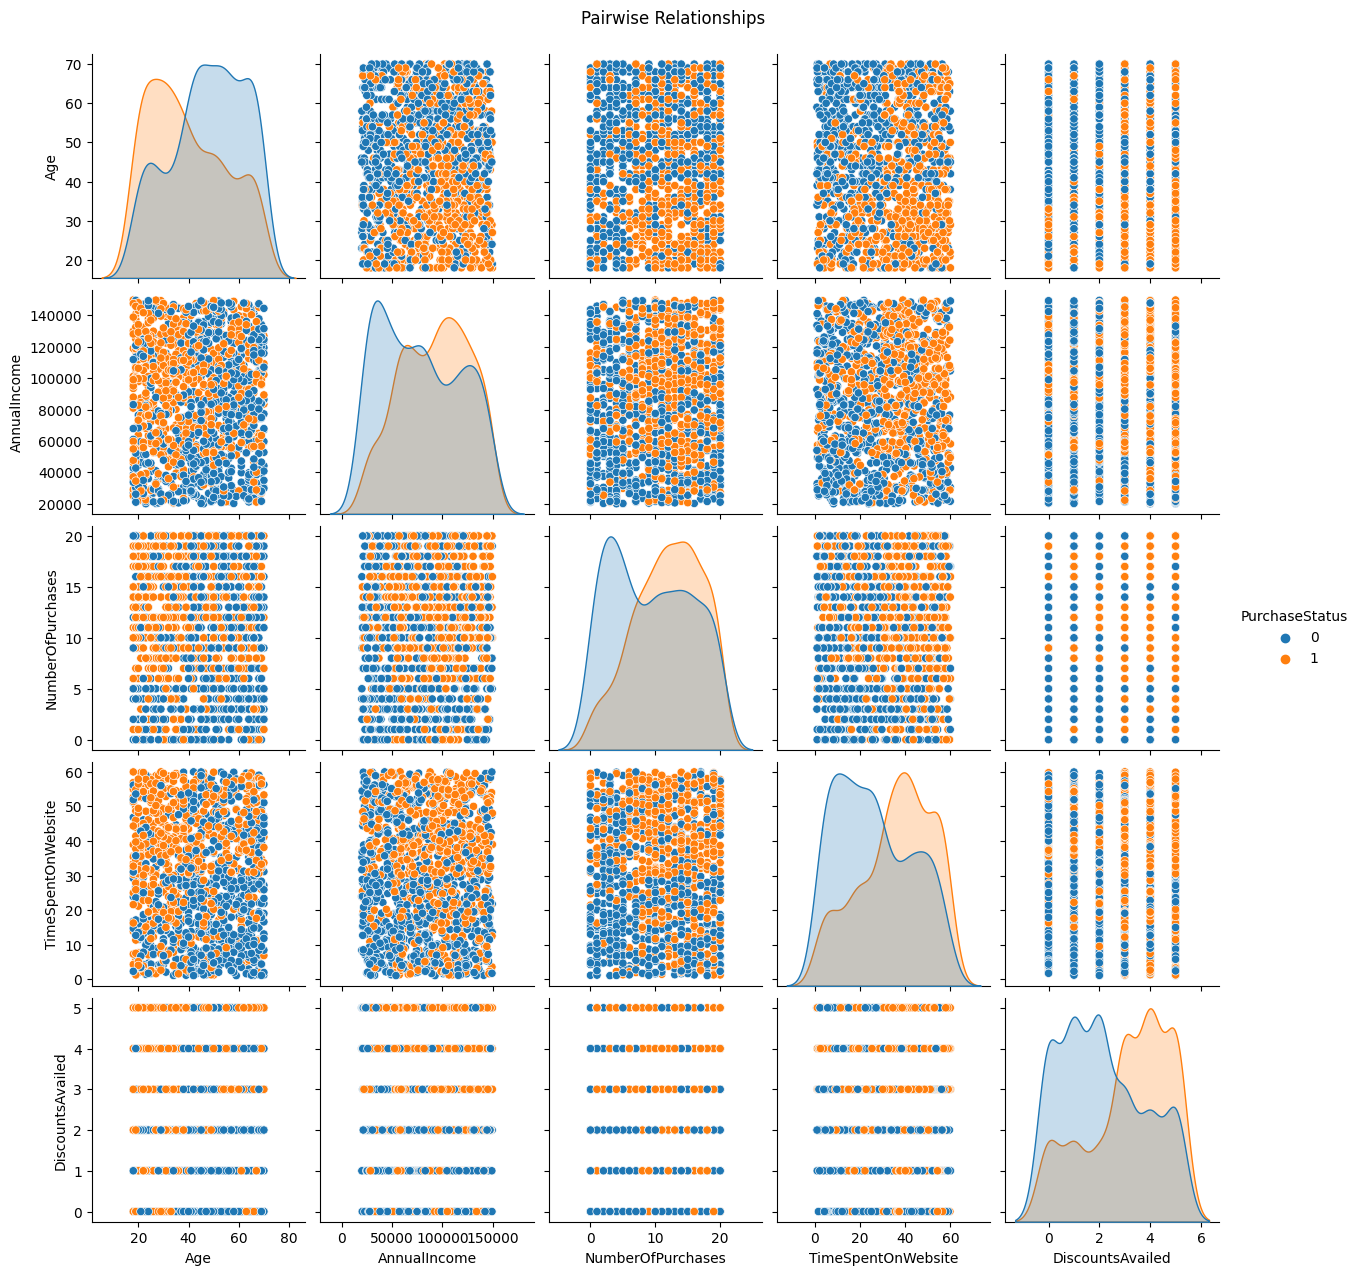

In [16]:
# Pairplot of numeric features
sns.pairplot(df[numeric_features + ['PurchaseStatus']], hue='PurchaseStatus')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [17]:
# Splitting the dataset into features and target variable
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features[:-1])  # Exclude the target variable
    ])

# Applying the transformation
X_transformed = preprocessor.fit_transform(X)


In [18]:
# Create an interaction feature between AnnualIncome and NumberOfPurchases
df['Income_Purchases'] = df['AnnualIncome'] * df['NumberOfPurchases']


In [19]:
from sklearn.linear_model import LogisticRegression

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       213
           1       0.85      0.80      0.82       204

    accuracy                           0.83       417
   macro avg       0.83      0.83      0.83       417
weighted avg       0.83      0.83      0.83       417

Confusion Matrix:
 [[183  30]
 [ 40 164]]


In [20]:
# Update the pipeline to use RandomForestClassifier
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model
model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test)

# Model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       213
           1       0.93      0.89      0.91       204

    accuracy                           0.91       417
   macro avg       0.91      0.91      0.91       417
weighted avg       0.91      0.91      0.91       417

Confusion Matrix:
 [[199  14]
 [ 23 181]]


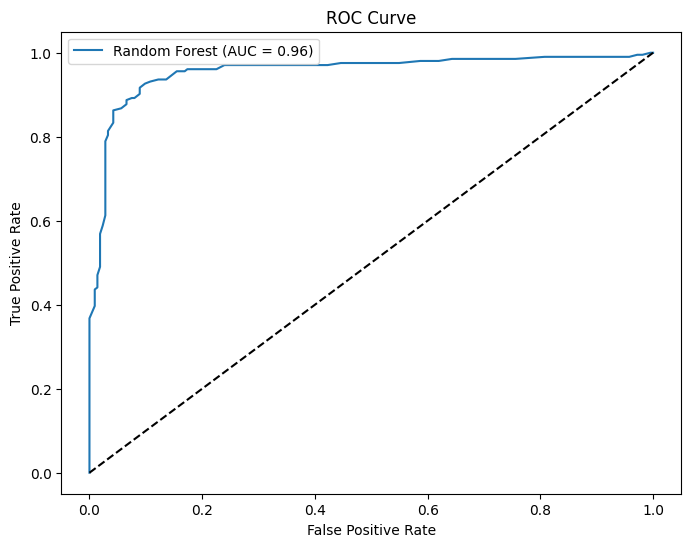

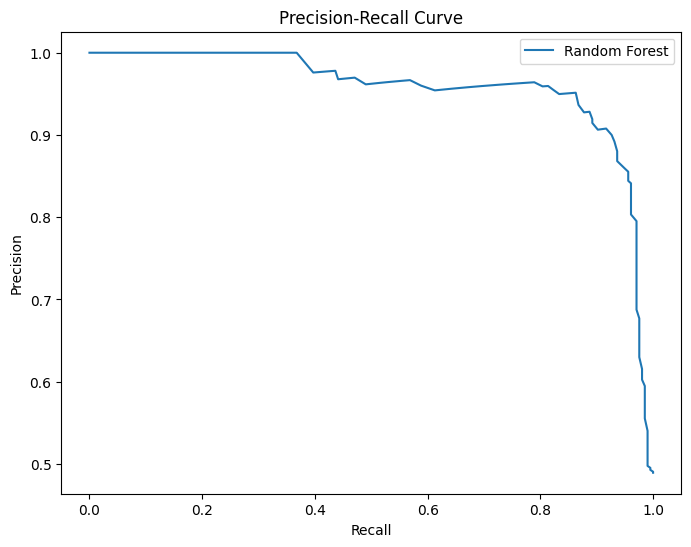

In [21]:
# Probability predictions
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()
